In [10]:
from google.colab import files
uploaded = files.upload()

Saving thpack1.txt to thpack1 (1).txt
Saving thpack2.txt to thpack2.txt
Saving thpack3.txt to thpack3.txt
Saving thpack4.txt to thpack4.txt
Saving thpack5.txt to thpack5.txt
Saving thpack6.txt to thpack6.txt
Saving thpack7.txt to thpack7.txt


In [2]:
# Let's just see what the file looks like
with open('thpack1.txt', 'r') as f:
    lines = f.readlines()

# Print first 20 lines
for i, line in enumerate(lines[:20]):
    print(f"Line {i}: {line.strip()}")

Line 0: 100
Line 1: 1 2502505
Line 2: 587 233 220
Line 3: 3
Line 4: 1 108 0 76 0 30 1 40
Line 5: 2 110 0 43 1 25 1 33
Line 6: 3 92 1 81 1 55 1 39
Line 7: 2 2502605
Line 8: 587 233 220
Line 9: 3
Line 10: 1 49 0 25 1 21 1 41
Line 11: 2 60 1 51 1 41 1 53
Line 12: 3 103 1 76 1 64 1 44
Line 13: 3 2502705
Line 14: 587 233 220
Line 15: 3
Line 16: 1 97 0 81 0 27 1 41
Line 17: 2 102 0 78 0 39 1 42
Line 18: 3 113 0 46 1 36 1 44
Line 19: 4 2502805


In [3]:
# Parse one box line to confirm understanding
line = "1 108 0 76 0 30 1 40"
parts = line.split()

print(f"Box type ID: {parts[0]}")
print(f"Dimensions: {parts[1]} × {parts[3]} × {parts[5]} cm")
print(f"Quantity: {parts[7]}")
print(f"Volume per box: {int(parts[1]) * int(parts[3]) * int(parts[5])} cm³")

Box type ID: 1
Dimensions: 108 × 76 × 30 cm
Quantity: 40
Volume per box: 246240 cm³


In [4]:
# Let's manually parse Problem 1

# Line 1: Problem ID and seed
problem_id = 1

# Line 2: Container dimensions
container_l, container_w, container_h = 587, 233, 220
container_volume = container_l * container_w * container_h
print(f"Container: {container_l} × {container_w} × {container_h} cm")
print(f"Container volume: {container_volume:,} cm³")

# Line 3: Number of box types = 3
# Lines 4-6: The three box types

boxes = [
    {"dims": (108, 76, 30), "qty": 40},
    {"dims": (110, 43, 25), "qty": 33},
    {"dims": (92, 81, 55), "qty": 39},
]

# Calculate total item volume
total_item_volume = 0
for box in boxes:
    l, w, h = box["dims"]
    vol = l * w * h * box["qty"]
    total_item_volume += vol
    print(f"Box {box['dims']}: {box['qty']} units, volume = {vol:,} cm³")

print(f"\nTotal item volume: {total_item_volume:,} cm³")
print(f"Fill ratio (theoretical max): {total_item_volume / container_volume:.2%}")

Container: 587 × 233 × 220 cm
Container volume: 30,089,620 cm³
Box (108, 76, 30): 40 units, volume = 9,849,600 cm³
Box (110, 43, 25): 33 units, volume = 3,902,250 cm³
Box (92, 81, 55): 39 units, volume = 15,984,540 cm³

Total item volume: 29,736,390 cm³
Fill ratio (theoretical max): 98.83%


In [5]:
def parse_one_problem(lines, start_index):
    """
    Parse a single problem starting at start_index.
    Returns the problem data and the next start index.
    """
    i = start_index

    # Line 1: Problem ID and seed
    parts = lines[i].split()
    problem_id = int(parts[0])
    i += 1

    # Line 2: Container dimensions
    dims = lines[i].split()
    container = {
        "length": int(dims[0]),
        "width": int(dims[1]),
        "height": int(dims[2])
    }
    container["volume"] = container["length"] * container["width"] * container["height"]
    i += 1

    # Line 3: Number of box types
    num_types = int(lines[i].strip())
    i += 1

    # Next n lines: Box types
    boxes = []
    total_item_volume = 0

    for _ in range(num_types):
        parts = lines[i].split()
        box = {
            "type_id": int(parts[0]),
            "dims": (int(parts[1]), int(parts[3]), int(parts[5])),
            "quantity": int(parts[7])
        }
        box["volume"] = box["dims"][0] * box["dims"][1] * box["dims"][2]
        total_item_volume += box["volume"] * box["quantity"]
        boxes.append(box)
        i += 1

    problem = {
        "id": problem_id,
        "container": container,
        "boxes": boxes,
        "num_types": num_types,
        "total_item_volume": total_item_volume,
        "fill_ratio": total_item_volume / container["volume"]
    }

    return problem, i

In [6]:
# Test on Problem 1 (starts at line index 1)
problem, next_index = parse_one_problem(lines, start_index=1)

print(f"Problem ID: {problem['id']}")
print(f"Container: {problem['container']}")
print(f"Number of box types: {problem['num_types']}")
print(f"Fill ratio: {problem['fill_ratio']:.2%}")
print(f"Next problem starts at line: {next_index}")

Problem ID: 1
Container: {'length': 587, 'width': 233, 'height': 220, 'volume': 30089620}
Number of box types: 3
Fill ratio: 98.83%
Next problem starts at line: 7


In [7]:
# Parse all 100 problems from thpack1.txt
all_problems = []

num_problems = int(lines[0].strip())  # First line tells us: 100
print(f"Total problems in file: {num_problems}")

current_index = 1  # Start after the first line

for _ in range(num_problems):
    problem, current_index = parse_one_problem(lines, current_index)
    all_problems.append(problem)

print(f"Successfully parsed: {len(all_problems)} problems")

Total problems in file: 100
Successfully parsed: 100 problems


In [8]:
# Let's see the distribution of fill ratios
fill_ratios = [p["fill_ratio"] for p in all_problems]

print(f"Fill Ratio Stats (Theoretical Max):")
print(f"  Min:  {min(fill_ratios):.2%}")
print(f"  Max:  {max(fill_ratios):.2%}")
print(f"  Mean: {sum(fill_ratios)/len(fill_ratios):.2%}")

Fill Ratio Stats (Theoretical Max):
  Min:  98.44%
  Max:  100.00%
  Mean: 99.58%


In [9]:
# What varies across problems?
num_types_list = [p["num_types"] for p in all_problems]
total_boxes_list = [sum(b["quantity"] for b in p["boxes"]) for p in all_problems]

print("Number of Box Types:")
print(f"  Min: {min(num_types_list)}, Max: {max(num_types_list)}")
print(f"  Unique values: {sorted(set(num_types_list))}")

print(f"\nTotal Boxes per Problem:")
print(f"  Min: {min(total_boxes_list)}, Max: {max(total_boxes_list)}")
print(f"  Mean: {sum(total_boxes_list)/len(total_boxes_list):.1f}")

Number of Box Types:
  Min: 3, Max: 3
  Unique values: [3]

Total Boxes per Problem:
  Min: 69, Max: 476
  Mean: 150.4


In [11]:
# Parse all 7 benchmark files
all_problems = []

for file_num in range(1, 8):
    filename = f"thpack{file_num}.txt"

    with open(filename, 'r') as f:
        lines = f.readlines()

    num_problems = int(lines[0].strip())
    current_index = 1

    for _ in range(num_problems):
        problem, current_index = parse_one_problem(lines, current_index)
        problem["source_file"] = filename  # Track which file it came from
        all_problems.append(problem)

    print(f"{filename}: {num_problems} problems, box types = {all_problems[-1]['num_types']}")

print(f"\nTotal problems: {len(all_problems)}")

thpack1.txt: 100 problems, box types = 3
thpack2.txt: 100 problems, box types = 5
thpack3.txt: 100 problems, box types = 8
thpack4.txt: 100 problems, box types = 10
thpack5.txt: 100 problems, box types = 12
thpack6.txt: 100 problems, box types = 15
thpack7.txt: 100 problems, box types = 20

Total problems: 700


In [12]:
# Group stats by file
for file_num in range(1, 8):
    filename = f"thpack{file_num}.txt"
    file_problems = [p for p in all_problems if p["source_file"] == filename]

    num_types = file_problems[0]["num_types"]
    total_boxes = [sum(b["quantity"] for b in p["boxes"]) for p in file_problems]

    print(f"{filename}: {num_types:2d} box types, boxes per problem: {min(total_boxes)}-{max(total_boxes)}")

thpack1.txt:  3 box types, boxes per problem: 69-476
thpack2.txt:  5 box types, boxes per problem: 81-266
thpack3.txt:  8 box types, boxes per problem: 80-232
thpack4.txt: 10 box types, boxes per problem: 75-233
thpack5.txt: 12 box types, boxes per problem: 84-218
thpack6.txt: 15 box types, boxes per problem: 85-203
thpack7.txt: 20 box types, boxes per problem: 90-172


In [13]:
def extract_features(problem):
    """Extract ML features from a problem."""
    container = problem["container"]
    boxes = problem["boxes"]

    # Total items
    total_items = sum(b["quantity"] for b in boxes)

    # All individual box volumes
    all_volumes = []
    for b in boxes:
        for _ in range(b["quantity"]):
            all_volumes.append(b["volume"])

    # Calculate features
    features = {
        # Basic counts
        "num_types": problem["num_types"],
        "total_items": total_items,
        "items_per_type": total_items / problem["num_types"],

        # Volume ratios
        "fill_ratio": problem["fill_ratio"],
        "avg_box_volume": sum(all_volumes) / len(all_volumes),
        "max_box_volume": max(all_volumes),
        "min_box_volume": min(all_volumes),

        # Heterogeneity (variation in box sizes)
        "volume_std": (sum((v - sum(all_volumes)/len(all_volumes))**2 for v in all_volumes) / len(all_volumes)) ** 0.5,
    }

    # Normalize volumes by container
    features["avg_box_ratio"] = features["avg_box_volume"] / container["volume"]
    features["max_box_ratio"] = features["max_box_volume"] / container["volume"]

    return features

In [14]:
# Extract features for all 700 problems
dataset = []

for problem in all_problems:
    features = extract_features(problem)
    features["problem_id"] = problem["id"]
    features["source_file"] = problem["source_file"]
    dataset.append(features)

print(f"Extracted features for {len(dataset)} problems")
print(f"\nSample (Problem 1):")
for key, value in dataset[0].items():
    if isinstance(value, float):
        print(f"  {key}: {value:.6f}")
    else:
        print(f"  {key}: {value}")

Extracted features for 700 problems

Sample (Problem 1):
  num_types: 3
  total_items: 112
  items_per_type: 37.333333
  fill_ratio: 0.988261
  avg_box_volume: 265503.482143
  max_box_volume: 409860
  min_box_volume: 118250
  volume_std: 117378.928488
  avg_box_ratio: 0.008824
  max_box_ratio: 0.013621
  problem_id: 1
  source_file: thpack1.txt


In [15]:
def boxes_overlap(box1, box2):
    overlap_x = box1["x"] < box2["x"] + box2["length"] and box1["x"] + box1["length"] > box2["x"]
    overlap_y = box1["y"] < box2["y"] + box2["width"] and box1["y"] + box1["width"] > box2["y"]
    overlap_z = box1["z"] < box2["z"] + box2["height"] and box1["z"] + box1["height"] > box2["z"]
    return overlap_x and overlap_y and overlap_z


def can_place(item, x, y, z, container, placed_boxes):
    if x + item["length"] > container["length"]:
        return False
    if y + item["width"] > container["width"]:
        return False
    if z + item["height"] > container["height"]:
        return False

    new_box = {"x": x, "y": y, "z": z,
               "length": item["length"], "width": item["width"], "height": item["height"]}

    for placed in placed_boxes:
        if boxes_overlap(new_box, placed):
            return False
    return True


def find_position(item, container, placed_boxes, step=50):
    for z in range(0, container["height"] - item["height"] + 1, step):
        for y in range(0, container["width"] - item["width"] + 1, step):
            for x in range(0, container["length"] - item["length"] + 1, step):
                if can_place(item, x, y, z, container, placed_boxes):
                    return {"x": x, "y": y, "z": z}
    return None

In [16]:
def find_position_with_rotation(item, container, placed_boxes, allow_rotation=True, step=50):
    # Try original orientation
    position = find_position(item, container, placed_boxes, step)
    if position:
        return {**position, "length": item["length"], "width": item["width"], "height": item["height"]}

    if not allow_rotation:
        return None

    # Try rotations
    rotations = [
        {"length": item["width"], "width": item["length"], "height": item["height"]},
        {"length": item["length"], "width": item["height"], "height": item["width"]},
        {"length": item["height"], "width": item["width"], "height": item["length"]},
    ]

    for rotated in rotations:
        rotated_item = {**item, **rotated}
        position = find_position(rotated_item, container, placed_boxes, step)
        if position:
            return {**position, **rotated}

    return None


def pack_items(items, container, allow_rotation=True, step=50):
    # 1. Expand by quantity
    expanded = []
    for item in items:
        for i in range(item["quantity"]):
            expanded.append({
                "length": item["dims"][0],
                "width": item["dims"][1],
                "height": item["dims"][2],
                "volume": item["volume"]
            })

    # 2. Sort by volume (largest first)
    expanded.sort(key=lambda x: x["volume"], reverse=True)

    # 3. Place each item
    placed_boxes = []
    placed_volume = 0

    for item in expanded:
        position = find_position_with_rotation(item, container, placed_boxes, allow_rotation, step)

        if position:
            placed_boxes.append({
                "x": position["x"], "y": position["y"], "z": position["z"],
                "length": position["length"], "width": position["width"], "height": position["height"]
            })
            placed_volume += position["length"] * position["width"] * position["height"]

    # 4. Calculate utilization
    container_volume = container["length"] * container["width"] * container["height"]
    utilization = placed_volume / container_volume

    return {
        "placed_count": len(placed_boxes),
        "total_count": len(expanded),
        "utilization": utilization
    }

In [19]:
def pack_items_extreme_points(items, container, allow_rotation=True):
    # 1. Expand by quantity
    expanded = []
    for item in items:
        for i in range(item["quantity"]):
            expanded.append({
                "length": item["dims"][0],
                "width": item["dims"][1],
                "height": item["dims"][2],
                "volume": item["volume"]
            })

    # 2. Sort by volume (largest first)
    expanded.sort(key=lambda x: x["volume"], reverse=True)

    # 3. Initialize
    placed_boxes = []
    placed_volume = 0

    # Extreme points - start with origin
    extreme_points = [(0, 0, 0)]

    def get_rotations(item):
        if not allow_rotation:
            return [(item["length"], item["width"], item["height"])]
        # All 6 orientations
        l, w, h = item["length"], item["width"], item["height"]
        return list(set([
            (l, w, h), (l, h, w),
            (w, l, h), (w, h, l),
            (h, l, w), (h, w, l)
        ]))

    def can_place_at(x, y, z, l, w, h):
        # Check bounds
        if x + l > container["length"] or y + w > container["width"] or z + h > container["height"]:
            return False

        # Check overlaps
        new_box = {"x": x, "y": y, "z": z, "length": l, "width": w, "height": h}
        for placed in placed_boxes:
            if boxes_overlap(new_box, placed):
                return False
        return True

    def generate_new_points(box):
        """Generate new extreme points from placed box corners."""
        x, y, z = box["x"], box["y"], box["z"]
        l, w, h = box["length"], box["width"], box["height"]

        new_points = [
            (x + l, y, z),      # Right of box
            (x, y + w, z),      # Front of box
            (x, y, z + h),      # Top of box
        ]
        return new_points

    # 4. Place each item
    for item in expanded:
        best_placement = None
        best_point_idx = -1

        # Try each extreme point
        for idx, (x, y, z) in enumerate(extreme_points):
            # Try each rotation
            for l, w, h in get_rotations(item):
                if can_place_at(x, y, z, l, w, h):
                    # Use first valid placement (greedy)
                    best_placement = {"x": x, "y": y, "z": z, "length": l, "width": w, "height": h}
                    best_point_idx = idx
                    break
            if best_placement:
                break

        if best_placement:
            placed_boxes.append(best_placement)
            placed_volume += best_placement["length"] * best_placement["width"] * best_placement["height"]

            # Remove used point and add new extreme points
            extreme_points.pop(best_point_idx)
            new_points = generate_new_points(best_placement)

            for p in new_points:
                if p not in extreme_points:
                    extreme_points.append(p)

            # Sort points (prefer lower z, then y, then x)
            extreme_points.sort(key=lambda p: (p[2], p[1], p[0]))

    # 5. Calculate utilization
    container_volume = container["length"] * container["width"] * container["height"]
    utilization = placed_volume / container_volume

    return {
        "placed_count": len(placed_boxes),
        "total_count": len(expanded),
        "utilization": utilization
    }

In [21]:
import time

results = []

start = time.time()
for i, problem in enumerate(all_problems):
    result = pack_items_extreme_points(problem["boxes"], problem["container"])
    result["problem_id"] = problem["id"]
    result["source_file"] = problem["source_file"]
    result["num_types"] = problem["num_types"]
    results.append(result)

    # Progress update every 100
    if (i + 1) % 100 == 0:
        print(f"Completed {i + 1} / 700")

elapsed = time.time() - start
print(f"\nDone! Total time: {elapsed:.1f} seconds")

Completed 100 / 700
Completed 200 / 700
Completed 300 / 700
Completed 400 / 700
Completed 500 / 700
Completed 600 / 700
Completed 700 / 700

Done! Total time: 442.2 seconds


In [22]:
# Utilization stats by file (number of box types)
print("Utilization by Problem Type:\n")
print(f"{'File':<15} {'Box Types':<12} {'Avg Util':<12} {'Min':<10} {'Max':<10}")
print("-" * 60)

for file_num in range(1, 8):
    filename = f"thpack{file_num}.txt"
    file_results = [r for r in results if r["source_file"] == filename]

    utils = [r["utilization"] for r in file_results]
    avg_util = sum(utils) / len(utils)
    min_util = min(utils)
    max_util = max(utils)
    num_types = file_results[0]["num_types"]

    print(f"{filename:<15} {num_types:<12} {avg_util*100:.1f}%{'':<6} {min_util*100:.1f}%{'':<4} {max_util*100:.1f}%")

Utilization by Problem Type:

File            Box Types    Avg Util     Min        Max       
------------------------------------------------------------
thpack1.txt     3            83.3%       67.7%     93.7%
thpack2.txt     5            83.9%       72.8%     91.5%
thpack3.txt     8            83.0%       72.3%     88.5%
thpack4.txt     10           82.4%       75.9%     87.6%
thpack5.txt     12           82.5%       76.1%     88.4%
thpack6.txt     15           82.5%       76.4%     88.5%
thpack7.txt     20           82.2%       74.2%     87.9%


In [23]:
# Add actual utilization to our dataset
for i, features in enumerate(dataset):
    features["actual_utilization"] = results[i]["utilization"]
    features["placed_count"] = results[i]["placed_count"]
    features["total_count"] = results[i]["total_count"]
    features["placement_rate"] = results[i]["placed_count"] / results[i]["total_count"]

# Verify
print("Sample data point:")
print(f"  File: {dataset[0]['source_file']}")
print(f"  Num types: {dataset[0]['num_types']}")
print(f"  Fill ratio (theoretical): {dataset[0]['fill_ratio']:.2%}")
print(f"  Actual utilization: {dataset[0]['actual_utilization']:.2%}")
print(f"  Placement rate: {dataset[0]['placement_rate']:.2%}")

Sample data point:
  File: thpack1.txt
  Num types: 3
  Fill ratio (theoretical): 98.83%
  Actual utilization: 86.15%
  Placement rate: 74.11%


In [24]:
import pandas as pd

# Convert to DataFrame for easier handling
df = pd.DataFrame(dataset)

# Select features we'll use for prediction
feature_columns = [
    "num_types",
    "total_items",
    "items_per_type",
    "fill_ratio",
    "avg_box_volume",
    "max_box_volume",
    "min_box_volume",
    "volume_std",
    "avg_box_ratio",
    "max_box_ratio"
]

# Target variable
target_column = "actual_utilization"

print(f"Dataset shape: {df.shape}")
print(f"Features: {len(feature_columns)}")
print(f"\nTarget stats:")
print(f"  Mean: {df[target_column].mean():.2%}")
print(f"  Std:  {df[target_column].std():.2%}")
print(f"  Min:  {df[target_column].min():.2%}")
print(f"  Max:  {df[target_column].max():.2%}")

Dataset shape: (700, 16)
Features: 10

Target stats:
  Mean: 82.82%
  Std:  3.36%
  Min:  67.71%
  Max:  93.66%


In [25]:
from sklearn.model_selection import train_test_split

X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

Training set: 560 samples
Test set: 140 samples


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train model
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

print("Model trained!")

Model trained!


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"  MAE:  {mae:.4f} ({mae*100:.2f}%)")
print(f"  RMSE: {rmse:.4f} ({rmse*100:.2f}%)")
print(f"  R²:   {r2:.4f}")

Model Performance:
  MAE:  0.0235 (2.35%)
  RMSE: 0.0301 (3.01%)
  R²:   0.1798


In [28]:
# Feature importance
importance = list(zip(feature_columns, model.feature_importances_))
importance.sort(key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feat, imp in importance:
    print(f"  {feat:<20} {imp:.4f}")

Feature Importance:
  min_box_volume       0.2307
  volume_std           0.1839
  items_per_type       0.1804
  num_types            0.0924
  fill_ratio           0.0894
  total_items          0.0540
  avg_box_volume       0.0460
  avg_box_ratio        0.0445
  max_box_ratio        0.0408
  max_box_volume       0.0379


In [29]:
# Compare a few predictions
print("Sample Predictions (Test Set):\n")
print(f"{'Actual':<12} {'Predicted':<12} {'Error':<10}")
print("-" * 34)

for i in range(10):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    error = abs(actual - predicted)
    print(f"{actual*100:.1f}%{'':<6} {predicted*100:.1f}%{'':<6} {error*100:.1f}%")

Sample Predictions (Test Set):

Actual       Predicted    Error     
----------------------------------
80.0%       82.5%       2.4%
83.8%       84.0%       0.2%
80.8%       83.8%       3.0%
87.3%       86.1%       1.2%
85.3%       84.1%       1.1%
85.1%       83.4%       1.7%
81.9%       82.6%       0.7%
79.9%       81.9%       2.0%
80.6%       84.0%       3.4%
84.9%       83.4%       1.5%


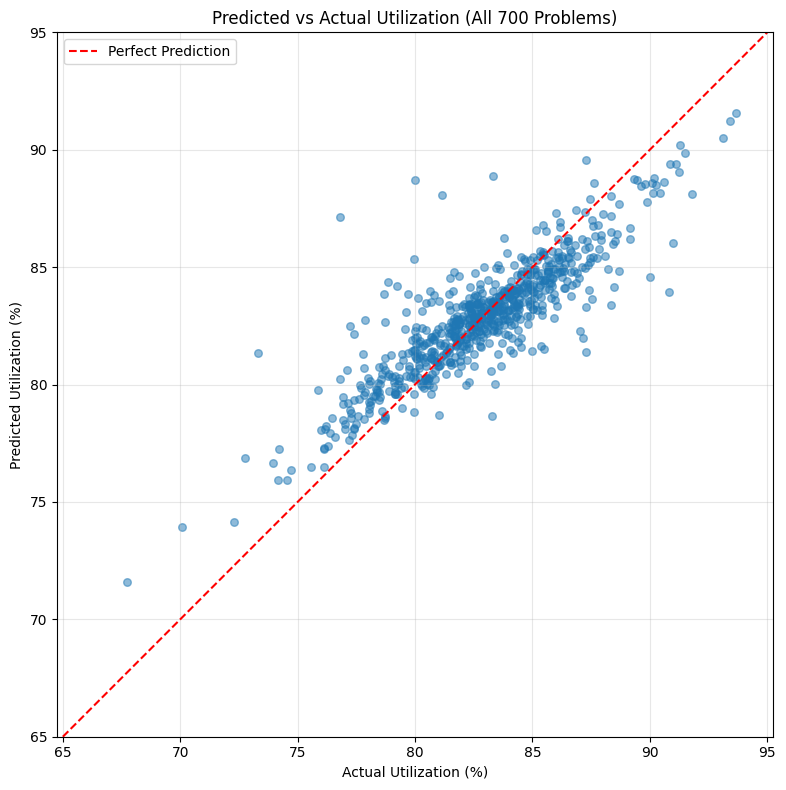

Saved as prediction_scatter.png


In [30]:
import matplotlib.pyplot as plt

# Predict on ALL data
y_all_pred = model.predict(X)
y_all_actual = y

# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_all_actual * 100, y_all_pred * 100, alpha=0.5, s=30)

# Perfect prediction line
plt.plot([65, 95], [65, 95], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Utilization (%)')
plt.ylabel('Predicted Utilization (%)')
plt.title('Predicted vs Actual Utilization (All 700 Problems)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.xlim(65, 95)
plt.ylim(65, 95)

plt.tight_layout()
plt.savefig('prediction_scatter.png', dpi=150)
plt.show()

print("Saved as prediction_scatter.png")

In [31]:
import pickle

# Save model
model_data = {
    "model": model,
    "feature_columns": feature_columns,
    "metrics": {
        "mae": mae,
        "rmse": rmse,
        "r2": r2
    }
}

with open("utilization_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Model saved to utilization_model.pkl")

# Download to your computer
from google.colab import files
files.download("utilization_model.pkl")

Model saved to utilization_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>